<a href="https://colab.research.google.com/github/yulya11/pet_projects_analytics/blob/main/Spotify_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('songs_normalize.csv')

### **Музыкальные характеристики треков**

| Характеристика                            | Описание                                                                                                                          |
| ----------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| **Energy (Энергичность)**                 | Уровень интенсивности и активности. Энергичные треки кажутся быстрыми, громкими и шумными.                                        |
| **Tempo (Темп)**                          | Скорость трека, измеряется в ударах в минуту (BPM).                                                                               |
| **Danceability (Танцевальность)**         | Оценка того, насколько трек подходит для танцев, на основе темпа, стабильности ритма, силы бита и общей регулярности.             |
| **Loudness (Громкость)**                  | Общая громкость трека в децибелах (дБ). Более высокие значения означают более громкие треки.                                      |
| **Liveness (Живость)**                    | Вероятность того, что трек исполняется вживую. Высокие значения указывают на присутствие аудитории (например, запись с концерта). |
| **Valence (Эмоциональность)**             | Общая позитивность трека. Высокие значения звучат радостно, низкие — грустно или зло.                                             |
| **Speechiness (Речевость)**               | Количество разговорной речи в треке.                                                                                              |
| **Instrumentalness (Инструментальность)** | Вероятность отсутствия вокала. Значения ближе к 1.0 означают полностью инструментальные треки.                                    |
| **Mode (Лад)**                            | Модальность трека (мажор/минор).                                                                                                  |
| **Key (Тональность)**                     | Музыкальная тональность, представленная числом от 0 до 11 (соответствует стандартной нотации).                                    |
| **Duration_ms (Длительность)**            | Длина трека в миллисекундах.                                                                                                      |
| **Acousticness (Акустичность)**           | Уверенность в том, что трек акустический (1 — да, 0 — нет).                                                                       |


### **Описательные характеристики**

| Характеристика                                     | Описание                                                                                       |
| -------------------------------------------------- | ---------------------------------------------------------------------------------------------- |
| **Track Name (Название трека)**                    | Название трека.                                                                                |
| **Track Artist (Исполнитель)**                     | Артист(ы), исполняющие трек.                                                                   |
| **Track Album Name (Альбом)**                      | Альбом, в котором содержится трек.                                                             |
| **Track Album Release Date (Дата выхода альбома)** | Дата выпуска альбома.                                                                          |
| **Track ID (ID трека)**                            | Уникальный идентификатор трека в Spotify.                                                      |
| **Track Album ID (ID альбома)**                    | Уникальный идентификатор альбома.                                                              |
| **Playlist Name (Название плейлиста)**             | Название плейлиста, в котором находится трек.                                                  |
| **Playlist Genre (Жанр плейлиста)**                | Основной жанр плейлиста (поп, рок, классика и т. д.).                                          |
| **Playlist Subgenre (Поджанр плейлиста)**          | Более узкий поджанр (инди-поп, панк-рок и т. д.).                                              |
| **Playlist ID (ID плейлиста)**                     | Уникальный идентификатор плейлиста.                                                            |
| **Track Popularity (Популярность трека)**          | Оценка популярности (0–100) на основе количества прослушиваний по сравнению с другими треками. |

In [3]:
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Посмотрим основные данные по датасету

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


Пропуски отсутствуют.

In [5]:
unique_genres = set()

def add_genres(genres_string):
  if isinstance(genres_string, str):
    for genre in genres_string.split(', '):
      unique_genres.add(genre.strip())

data['genre'].apply(add_genres)
print('Список жанров', unique_genres)

Список жанров {'pop', 'World/Traditional', 'jazz', 'rock', 'metal', 'easy listening', 'Folk/Acoustic', 'country', 'hip hop', 'classical', 'R&B', 'blues', 'latin', 'Dance/Electronic', 'set()'}


Есть целый ряд песен с неустановленным жанром

In [6]:
data.query('genre == "set()"')['genre'].count()

np.int64(22)

Дублированные песни

In [7]:
data[data.duplicated(['artist','song'])]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
161,Craig David,Fill Me In,257200,False,2000,60,0.682,0.744,8,-6.981,1,0.0365,0.37600,0.009510,0.0600,0.827,132.493,"hip hop, pop, R&B"
179,Destiny's Child,"Independent Women, Pt. 1",221133,False,2001,65,0.730,0.602,6,-3.782,0,0.2060,0.36200,0.000004,0.1690,0.927,97.954,"pop, R&B"
187,Gabrielle,Rise,219093,False,2001,60,0.558,0.481,8,-9.487,1,0.0260,0.31500,0.000009,0.0900,0.631,144.673,"pop, R&B"
215,Linkin Park,In the End,216880,False,2000,83,0.556,0.864,3,-5.870,0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,"rock, metal"
236,Kylie Minogue,Spinning Around,207866,False,2000,55,0.761,0.662,6,-7.645,0,0.0548,0.29200,0.000062,0.0956,0.631,120.043,"pop, Dance/Electronic"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,Jax Jones,Breathe,207629,False,2017,58,0.722,0.744,11,-5.520,0,0.0363,0.02340,0.000157,0.1430,0.686,125.985,"hip hop, pop, Dance/Electronic"
1855,Cardi B,Bodak Yellow,223712,True,2018,72,0.926,0.703,11,-6.337,0,0.1030,0.06590,0.000000,0.2310,0.485,125.022,"hip hop, pop"
1921,Travis Scott,SICKO MODE,312820,True,2018,81,0.834,0.730,8,-3.714,1,0.2220,0.00513,0.000000,0.1240,0.446,155.008,"hip hop, Dance/Electronic"
1929,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"


In [8]:
data[(data['artist']=='Craig David') & (data['song']=='Fill Me In')]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
63,Craig David,Fill Me In,257200,False,2000,60,0.682,0.744,8,-6.981,1,0.0365,0.376,0.00951,0.06,0.827,132.493,"hip hop, pop, R&B"
161,Craig David,Fill Me In,257200,False,2000,60,0.682,0.744,8,-6.981,1,0.0365,0.376,0.00951,0.06,0.827,132.493,"hip hop, pop, R&B"


Их необходимо удалить

In [9]:
data = data[~data.duplicated(['artist','song'])]

In [10]:
data.shape

(1926, 18)

Посмотрим статистические характеристики у числовых признаков

In [11]:
print(data.describe())

         duration_ms         year   popularity  danceability       energy  \
count    1926.000000  1926.000000  1926.000000    1926.00000  1926.000000   
mean   228648.418484  2009.492731    59.660436       0.66792     0.721996   
std     39293.491373     5.877335    21.436320       0.14029     0.153125   
min    113000.000000  1998.000000     0.000000       0.12900     0.054900   
25%    203509.500000  2004.000000    56.000000       0.58100     0.624250   
50%    223259.500000  2010.000000    65.000000       0.67650     0.739000   
75%    248036.000000  2015.000000    73.000000       0.76500     0.841000   
max    484146.000000  2020.000000    89.000000       0.97500     0.999000   

               key     loudness         mode  speechiness  acousticness  \
count  1926.000000  1926.000000  1926.000000  1926.000000   1926.000000   
mean      5.365524    -5.509368     0.553479     0.103780      0.128478   
std       3.616030     1.942454     0.497261     0.096256      0.172938   
min   

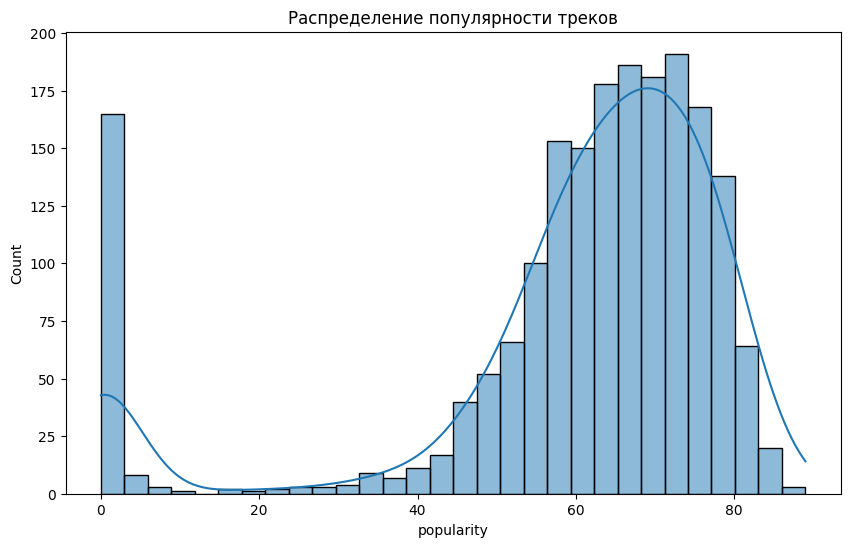

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=30, kde=True)
plt.title('Распределение популярности треков')
plt.show()

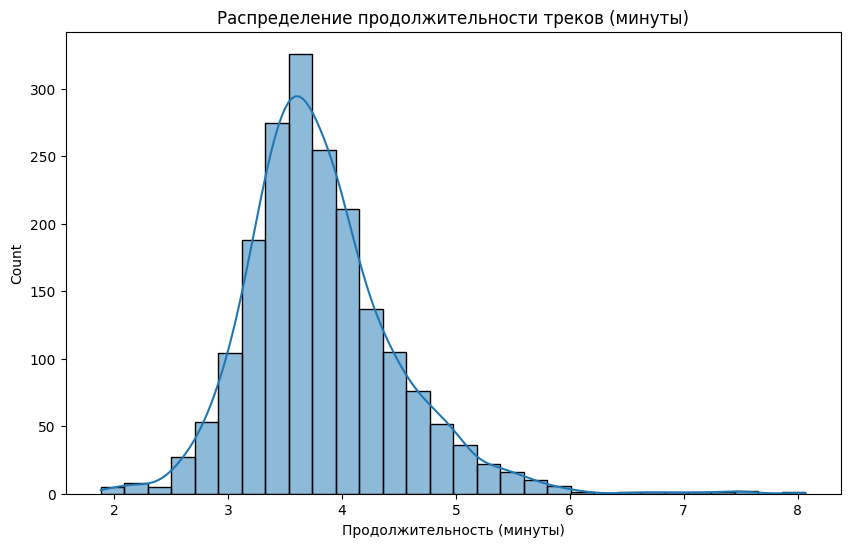

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['duration_ms'] / 60000, bins=30, kde=True)
plt.title('Распределение продолжительности треков (минуты)')
plt.xlabel('Продолжительность (минуты)')
plt.show()

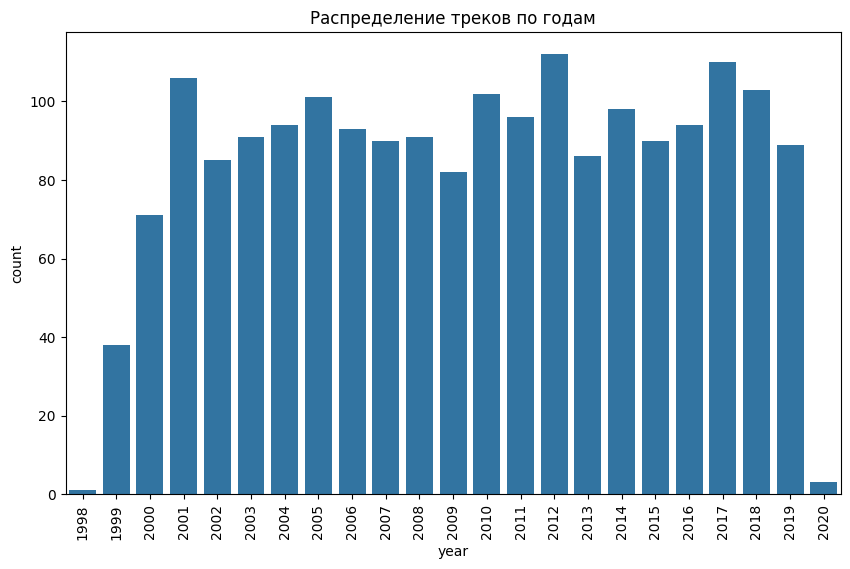

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=data)
plt.title('Распределение треков по годам')
plt.xticks(rotation=90)
plt.show()

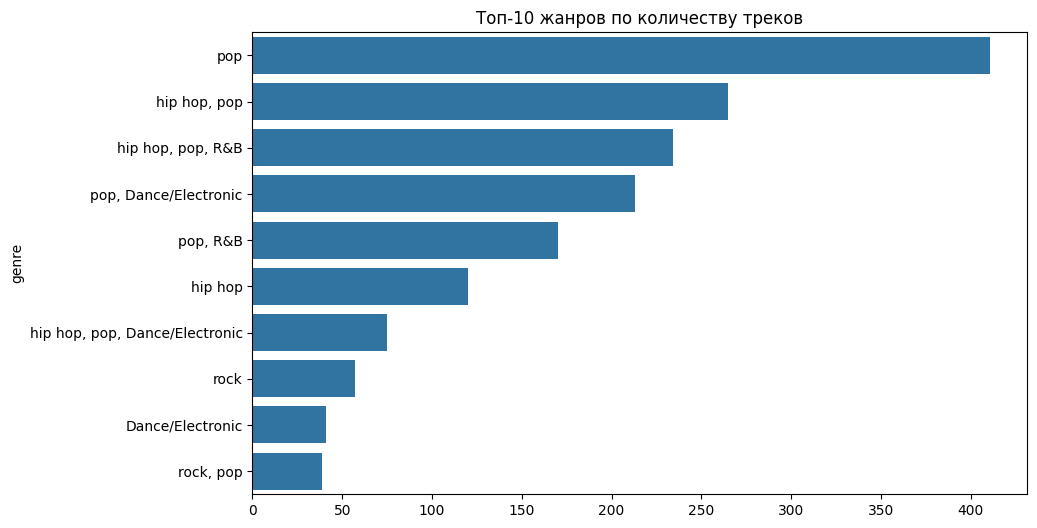

In [15]:
genre_counts = data['genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Топ-10 жанров по количеству треков')
plt.show()

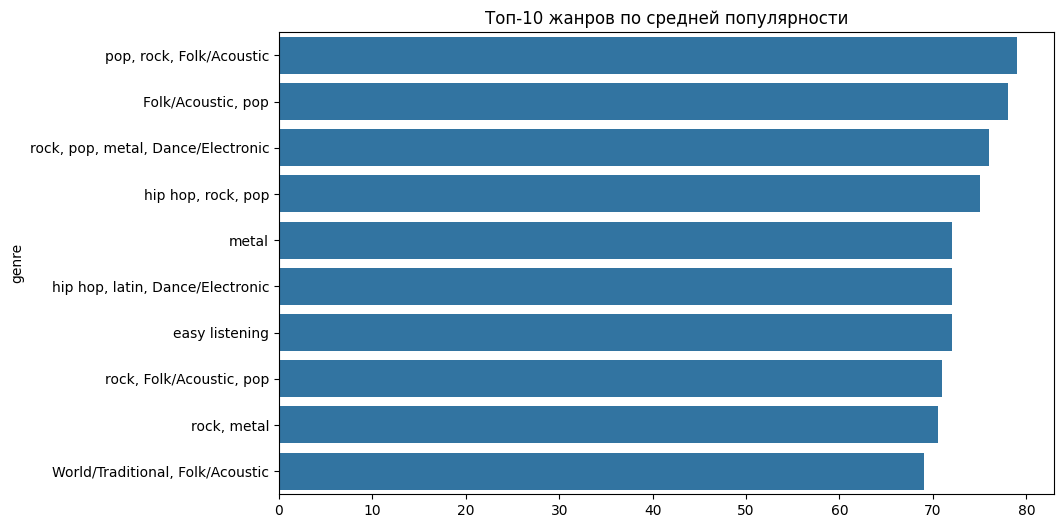

In [16]:
genre_popularity = data.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index)
plt.title('Топ-10 жанров по средней популярности')
plt.show()

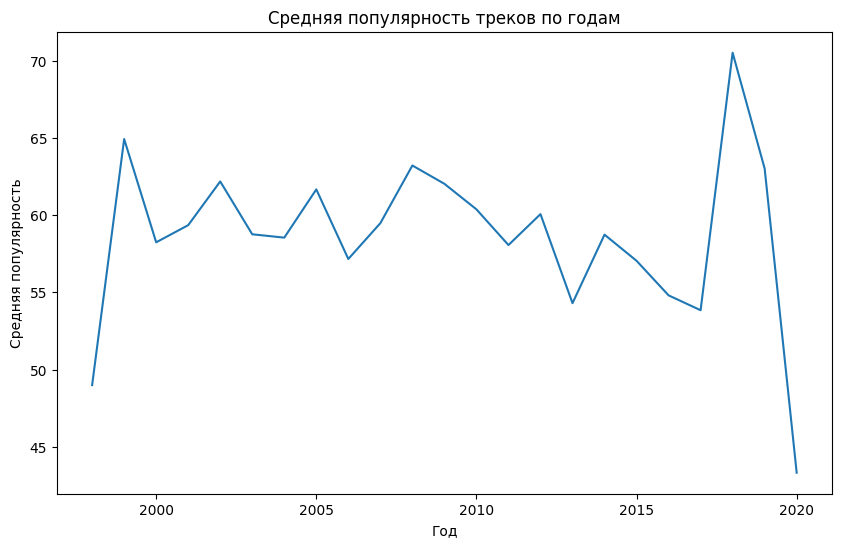

In [17]:
year_popularity = data.groupby('year')['popularity'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=year_popularity.index, y=year_popularity.values)
plt.title('Средняя популярность треков по годам')
plt.xlabel('Год')
plt.ylabel('Средняя популярность')
plt.show()

## Модель предсказания рейтинга

Посмотрим, возможно ли предсказать рейтинг трека, опираясь лишь на музыкальные характеристики

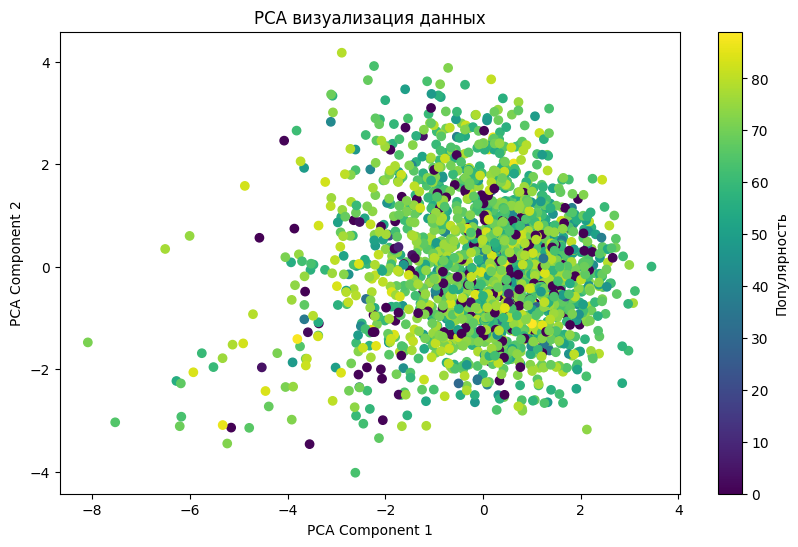

Среднеквадратичная ошибка: 477.42414468911915
Коэффициент детерминации (R^2): 0.004929535378924599
             feature  importance
6           loudness    0.100084
0        duration_ms    0.099617
12           valence    0.096661
2               year    0.090117
9       acousticness    0.089454
4             energy    0.088873
11          liveness    0.087895
13             tempo    0.085374
3       danceability    0.077769
8        speechiness    0.074297
10  instrumentalness    0.049238
5                key    0.044345
7               mode    0.009882
1           explicit    0.006394


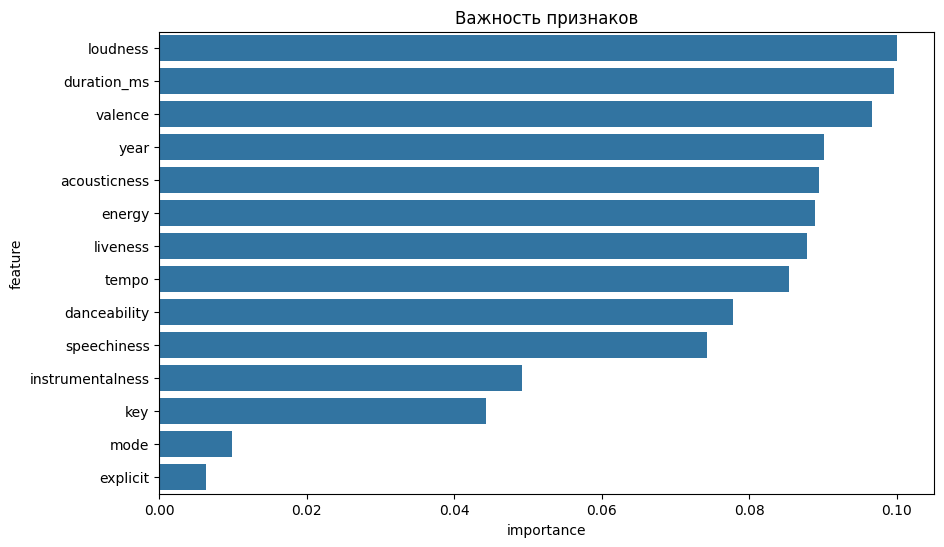

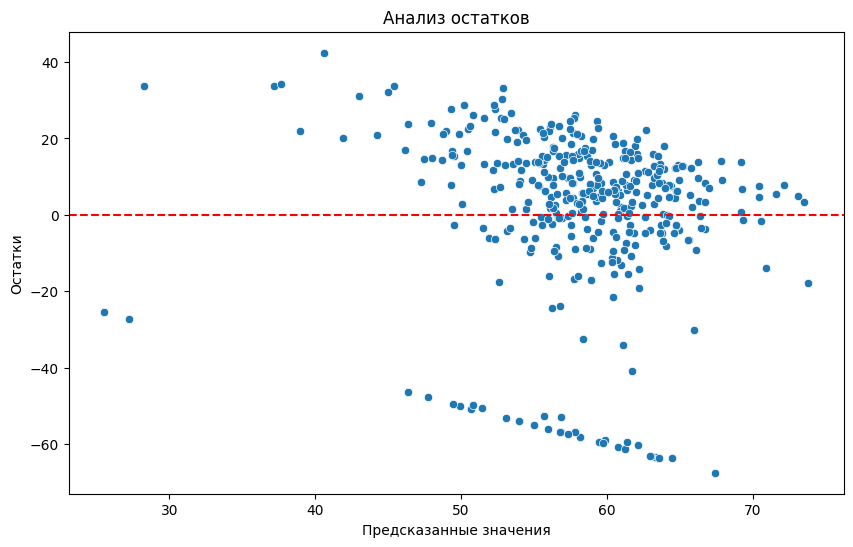

In [18]:
X = data.drop(['artist', 'song', 'popularity', 'genre'], axis=1)
y = data['popularity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Популярность')
plt.title('PCA визуализация данных')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Среднеквадратичная ошибка: {mse}')
print(f'Коэффициент детерминации (R^2): {r2}')

importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Важность признаков')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Анализ остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

Качество модели очень низкое. Попробуем предсказать рейтинг, добавив жанр.

In [30]:
from sklearn.preprocessing import OneHotEncoder
X = data.drop(['artist', 'song', 'popularity', 'genre'], axis=1)
y = data['popularity']

encoder = OneHotEncoder(sparse_output=False)
ohe_array = encoder.fit_transform(data[["genre"]])

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
ohe_df = pd.DataFrame(ohe_array, columns=encoder.get_feature_names_out())

X_scaled = pd.concat([X_scaled, ohe_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Среднеквадратичная ошибка: {mse}')
print(f'Коэффициент детерминации (R^2): {r2}')


Среднеквадратичная ошибка: 468.79578518458555
Коэффициент детерминации (R^2): 0.02291317905636092


Качество улучшилось, однако не очень сильно

## Проверка гипотез

Проверим гипотезу

H0: Рейтинг песен жанра поп и рейтинг песен жанра хип-хоп/поп не отличаются (принадлежат одной генеральной совокупности).

In [31]:
from scipy.stats import ttest_ind

pop_music = data[data['genre'] == 'pop']['popularity']
rock_music = data[data['genre'] == 'hip hop, pop']['popularity']

t_stat, p_value = ttest_ind(pop_music, rock_music)
print(f'T-статистика: {t_stat}, P-значение: {p_value}')

T-статистика: -3.076727937634104, P-значение: 0.0021776421418033287


В результате нулевая гипотеза отвергается. Жанр оказывает влияние на рейтинг песен.

Корреляция между признаками

In [32]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(data['danceability'], data['popularity'])
print(f'Корреляция: {corr}, P-значение: {p_value}')

Корреляция: 0.0005901428270727385, P-значение: 0.9793511985473556
